In [453]:
# LSTM - A-95
'''Точечное прогнозирование. В данном случае модель обучается прогнозированию одного значения в будущем 
на основе имеющейся истории по одной переменной.'''

'Точечное прогнозирование. В данном случае модель обучается прогнозированию одного значения в будущем \nна основе имеющейся истории по одной переменной.'

In [454]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [455]:
# Importing the dataset
df = pd.read_excel('cena1.xlsx', encoding='ISO-8859-1')

In [456]:
df

,Date,Price,Kurs_dollar,Kurs_euro,Oil_price,Used
0,2017-01-03,23.82,27.190858,28.422604,55.64,57.611681
1,2017-01-04,23.85,27.190858,28.422604,56.25,57.571419
2,2017-01-05,23.85,26.692366,27.858822,56.77,57.532696
3,2017-01-06,23.87,26.286719,27.603684,56.82,57.496014
4,2017-01-10,23.87,27.020929,28.612462,53.64,57.379405
...,...,...,...,...,...,...
877,2020-07-27,22.87,27.755900,32.224600,43.95,77.059356
878,2020-07-28,22.87,27.757100,32.604900,43.65,76.648569
879,2020-07-29,22.87,27.685100,32.453900,44.10,76.239853
880,2020-07-30,22.89,27.686700,32.469600,43.61,75.834026


In [457]:
# Checking missing
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Used,0,0.0
Oil_price,0,0.0
Kurs_euro,0,0.0
Kurs_dollar,0,0.0
Price,0,0.0
Date,0,0.0


In [458]:
df.describe()

,Price,Kurs_dollar,Kurs_euro,Oil_price,Used
count,882.000000,882.000000,882.000000,882.000000,882.000000
mean,27.532562,26.498737,30.160756,60.133821,64.758612
std,2.716192,1.141419,1.949076,12.320516,8.235289
min,21.820000,23.255155,25.766712,19.640000,45.035957
25%,25.072500,26.015569,28.953476,53.677500,60.394068
50%,28.500000,26.623103,30.210887,61.865000,64.395885
75%,29.207500,27.167187,31.533802,68.122500,69.702419
max,33.160000,28.875837,35.664229,86.100000,85.378682


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012FFECA7070>],
      dtype=object)

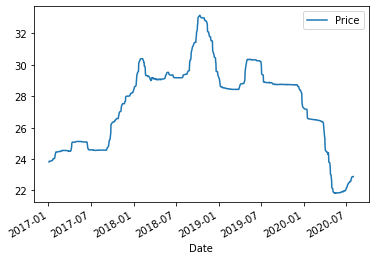

In [459]:
# Features 
uni_data = df.iloc[:, 1:2]
uni_data.index = df['Date']
uni_data.plot(subplots=True)

In [460]:
'''Функция возвращает временные интервалы для обучения модели. 
Аргумент history_size — размер временного интервала, на основе которого будет делаться прогноз, 
target_size – аргумент, определяющий насколько далеко в будущее модель должна научиться прогнозировать. 
Другими словами, target_size – это целевой вектор, который необходимо спрогнозировать.'''
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

SyntaxError: invalid syntax (<ipython-input-460-f39ac0cfa25f>, line 6)

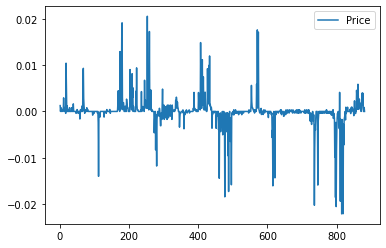

In [448]:
'''Подготовим данные для модели с одномерным входом.'''
uni_data = uni_data.values

TRAIN_SPLIT = 705
# Feature Scaling
uni_data = df.iloc[:, 1:2].pct_change()
uni_data.plot()

In [452]:
'''На вход в модель будут подаваться последние 12 зарегистрированных наблюдений за температурой, 
модель необходимо обучить прогнозировать температуру на следующем шаге по времени.'''
# Creating lagged dataset
univariate_past_history = 15
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data.iloc[1:], 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data.iloc[1:], TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

KeyError: "None of [Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')] are in the [columns]"

In [398]:
'''Результаты применения функции univariate_data.'''
# Sliding window
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history


NameError: name 'x_train_uni' is not defined

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [ ]:
# One sliding window plotting
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [ ]:
'''Прежде чем приступить к обучению модели, рассчитаем базовое решение (baseline). 
Оно заключается в следующем: для заданного входного вектора метод базового решения 
«просматривает» всю историю и прогнозирует следующее значение как среднее из последних 12 наблюдений.'''
# Baseline model
def baseline(history):
  return np.mean(history)

In [ ]:
# Baseline Prediction plotting
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [ ]:
# Importing the Tensorflow libraries and packages
import tensorflow as tf
#from tf.data import Dataset

# Importing the Keras libraries and packages
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
'''C помощью tf.data выполним перемешивание (shuffle), пакетирование (batch) и кэширование (cache) набора данных.'''
# Data preprocessing
BATCH_SIZE = 128
BUFFER_SIZE = 500

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
# LSTM creating
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(4, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [ ]:
'''Проверим выход модели'''
simple_lstm_model.predict(val_univariate.take(1)).shape

In [ ]:
'''В общем плане РНС работают с последовательностями (sequences). 
Это означает, что подаваемые на вход модели данные должны иметь следующую форму:
[наблюдения, временной интервал, кол-во признаков]
Форма обучающих данных для модели с одномерным входом имеет следующий вид:'''
print(x_train_uni.shape)

In [ ]:
# Fitting
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

In [ ]:
# LSTM Prediction plotting
show_plot([x_val_uni[0], y_val_uni[0], simple_lstm_model.predict(val_univariate.take(1))[0]], 0,
           'LSTM Prediction Example')

In [ ]:
# LSTM Prediction plotting
for i in range(0,3):
    plot = show_plot([x_val_uni[i], y_val_uni[i], simple_lstm_model.predict(val_univariate.take(1))[i]], 0,
           'LSTM Prediction Example')
    plot.show()